# Seconda challenge di prova - Telcochurn dataset
## Notebook di **training**.

In [88]:
!pip install -r requirements.txt

# Informazioni sui dati
- Clienti che se ne sono andati nell'ultimo mese – la colonna si chiama **Churn**
- Servizi a cui ogni cliente si è registrato: telefono, più linee, Internet, sicurezza online, backup online, protezione del dispositivo, supporto tecnico e streaming di TV e film
- Informazioni sull'account del cliente: da quanto tempo è cliente, contratto, metodo di pagamento, fatturazione senza carta, addebiti mensili e addebiti totali
- Informazioni demografiche sui clienti: sesso, fascia di età e se hanno partner e persone a carico

## Import delle librerie necessarie

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import del Training Set e del Test Set

In [25]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

## Exploratory Data Analysis

In [26]:
# stampo un sample del dataset per avere un'idea delle variabili
train.sample(5)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
354,No,1136-XGEQU,Female,0,Yes,Yes,50,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),84.15,4164.4
2746,No,4203-QGNZA,Female,0,No,Yes,28,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,535.35
4157,Yes,4929-BSTRX,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,53.55,53.55
1185,Yes,0137-OCGAB,Female,0,No,No,1,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,80.20,80.2
1616,No,3229-USWAR,Female,0,No,No,34,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.95,2727.3


In [27]:
train.describe(include="all")

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,4507,4507,4507,4507.000000,4507,4507,4507.000000,4507,4507,4507,...,4507,4507,4507,4507,4507,4507,4507,4507,4507.000000,4507
unique,2,4507,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,4276
top,No,1925-LFCZZ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,3316,1,2325,NaN,2327,3181,NaN,4068,2180,1967,...,1941,1989,2234,1779,1771,2487,2646,1521,NaN,10
mean,NaN,NaN,NaN,0.161748,NaN,NaN,32.044597,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.808764,NaN
std,NaN,NaN,NaN,0.368261,NaN,NaN,24.328049,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.047022,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.850000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,28.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.450000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   object 
 1   customerID        4507 non-null   object 
 2   gender            4507 non-null   object 
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   object 
 5   Dependents        4507 non-null   object 
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   object 
 8   MultipleLines     4507 non-null   object 
 9   InternetService   4507 non-null   object 
 10  OnlineSecurity    4507 non-null   object 
 11  OnlineBackup      4507 non-null   object 
 12  DeviceProtection  4507 non-null   object 
 13  TechSupport       4507 non-null   object 
 14  StreamingTV       4507 non-null   object 
 15  StreamingMovies   4507 non-null   object 
 16  Contract          4507 non-null   object 


In [29]:
train.replace(' ', np.NaN, inplace=True)
test.replace(' ', np.NaN, inplace=True)

In [30]:
# controllo la presenza di valori nulli
pd.isnull(train).sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [31]:
pd.isnull(test).sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

Da questa analisi preliminare dei dati è possibile fare due osservazioni:
- **CustomerID** non è un campo che potrebbe davvero prevedere il tasso di abbandono dei clienti, possiamo farne a meno.
- La colonna **TotalCharges** è di tipo Object, conviene convertirla in float dal momento che rappresenta l'addebito totale, in modo simile a MonthlyCharges che rappresenta l'addebito mensile ed è già in float. Inoltre, la colonna TotalCharges presenta dei valori nulli, che sovrascriveremo con la media degli addebbiti degli altri clienti. 

In [32]:
train = train.drop('customerID', axis=1)
test = test.drop('customerID', axis=1)

In [33]:
train['TotalCharges'] = train['TotalCharges'].astype(np.float)
train['TotalCharges'] = train['TotalCharges'].fillna(train['TotalCharges'].mean())

test['TotalCharges'] = test['TotalCharges'].astype(np.float)
test['TotalCharges'] = test['TotalCharges'].fillna(test['TotalCharges'].mean())

## Data Visualization

- **Categorical Variables**: 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'

- **Numerical Variables**: 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'

In [34]:
categorical_cols = train.select_dtypes(include='object')

In [35]:
for column in categorical_cols.columns:
    print(column,'-',train[column].unique())

Churn - ['No' 'Yes']
gender - ['Male' 'Female']
Partner - ['No' 'Yes']
Dependents - ['No' 'Yes']
PhoneService - ['Yes' 'No']
MultipleLines - ['No' 'Yes' 'No phone service']
InternetService - ['No' 'Fiber optic' 'DSL']
OnlineSecurity - ['No internet service' 'Yes' 'No']
OnlineBackup - ['No internet service' 'Yes' 'No']
DeviceProtection - ['No internet service' 'Yes' 'No']
TechSupport - ['No internet service' 'Yes' 'No']
StreamingTV - ['No internet service' 'Yes' 'No']
StreamingMovies - ['No internet service' 'Yes' 'No']
Contract - ['One year' 'Two year' 'Month-to-month']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


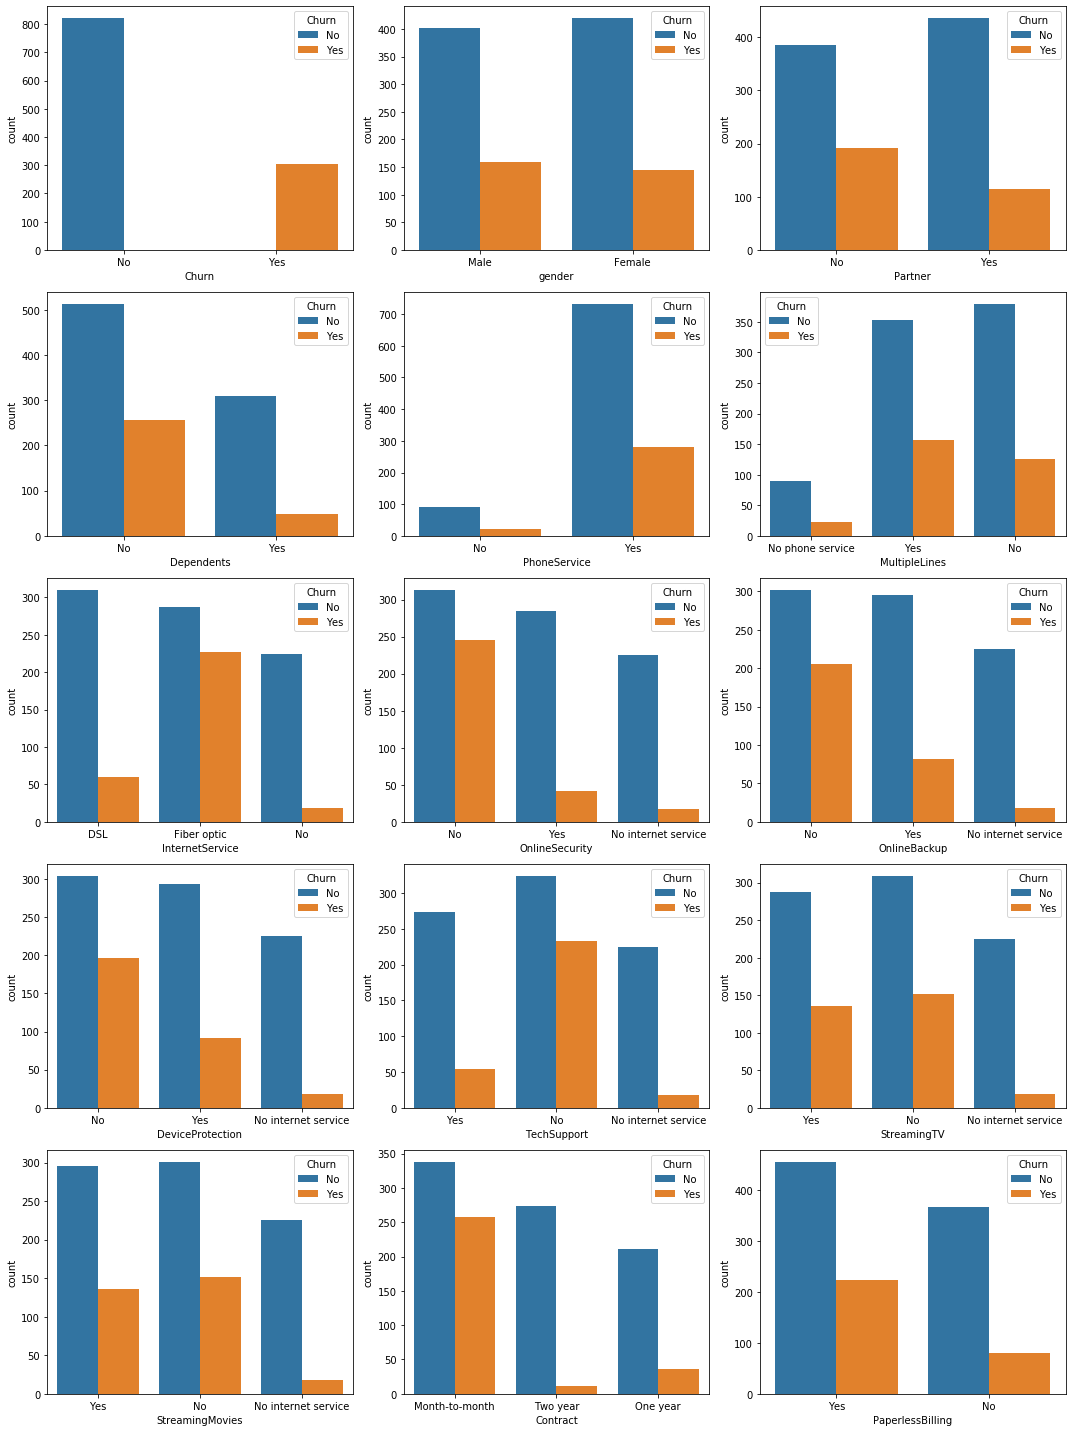

In [36]:
plt.figure(figsize=(15,20))

i=1
for col_name in categorical_cols.columns[0:15]: # la feature target Churn è in inclusa in categorical_features
    plt.subplot(5,3,i)
    sns.countplot(test[col_name],hue=test['Churn'])
    i +=1
    plt.tight_layout()

Dall'analisi dei grafici è possibile constatare che il tasso di abbandono è basso per la feature **No internet service**, mentre è significativamente alto per il contratto mensile (**Month-to-month**), il metodo di pagamento con assegno elettronico (**Electronic check**) e l'assenza di **OnlineSecurity**.

## Data Preparation e Feature Engineering

### Label Encoding

**Label Encoding** è una tecnica di codifica per la gestione delle categorical variables. Con questa tecnica, ad ogni dato viene assegnato un numero intero univoco.

In [37]:
# Label Encoding per le feature 'Yes' e 'No' :
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

labelEncoding_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

train[labelEncoding_cols] = train[labelEncoding_cols].astype('category')
test[labelEncoding_cols] = test[labelEncoding_cols].astype('category')

for column in labelEncoding_cols:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

### OneHot Encoding

**OneHot Encoding** è la rappresentazione binaria delle categorical variables. Questo processo richiede che i valori vengano prima mappati a valori interi. Successivamente, ogni valore intero è rappresentato come un vettore binario con tutti i valori a zero tranne l'indice intero contrassegnato con 1.

In [38]:
oneHot_cols = ['MultipleLines', 'Contract', 'InternetService', 
                    'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_ = train.drop(oneHot_cols, axis=1)
train_dummies = pd.get_dummies(train[oneHot_cols])
train = pd.concat([train_, train_dummies], axis=1)

test_ = test.drop(oneHot_cols, axis=1)
test_dummies = pd.get_dummies(test[oneHot_cols])
test = pd.concat([test_, test_dummies], axis=1)

In [39]:
# per comodità rinomino le feature, riscrivendole in minuscolo
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

### Verifico la correlazione tra le variabili.

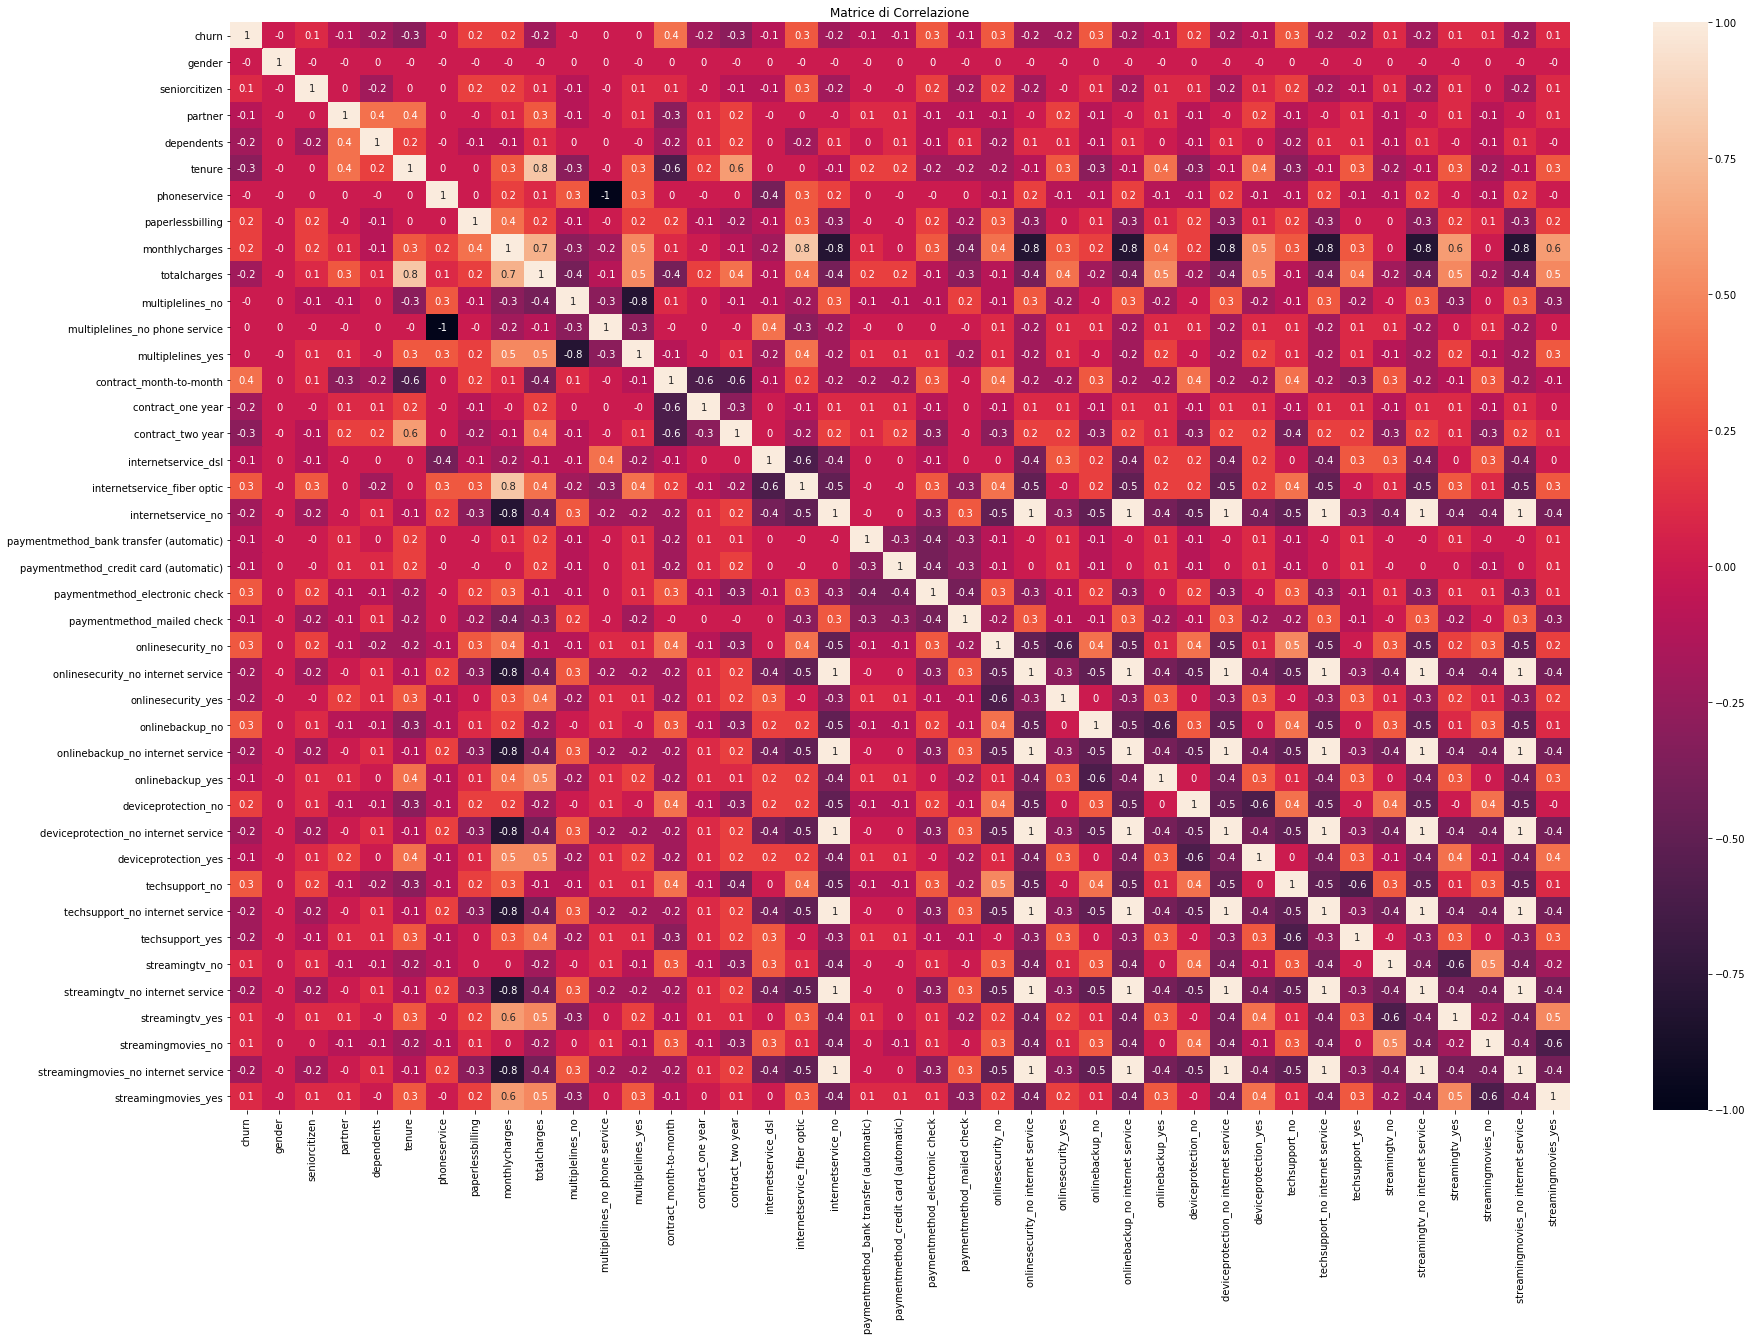

In [40]:
plt.figure(figsize = (30,20))
matrix = sns.heatmap(round(train.corr(), 1), annot=True).set_title('Matrice di Correlazione')
plt.show()

In [41]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >= threshold and (corr_matrix.columns[j] not in col_corr)):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]

In [42]:
# elimino le feature altamente correlate
correlation(dataset=train, threshold=0.95)
correlation(dataset=test, threshold=0.95)

### Normalizzo le variabili continue.

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

train[['tenure', 'monthlycharges', 'totalcharges']] = scaler.fit_transform(train[['tenure', 'monthlycharges', 'totalcharges']])
test[['tenure', 'monthlycharges', 'totalcharges']] = scaler.fit_transform(test[['tenure', 'monthlycharges', 'totalcharges']])

In [47]:
train.sample(5)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,...,onlinebackup_no,onlinebackup_yes,deviceprotection_no,deviceprotection_yes,techsupport_no,techsupport_yes,streamingtv_no,streamingtv_yes,streamingmovies_no,streamingmovies_yes
3408,0,1,1,0,1,0.152778,1,1,0.361734,0.067206,...,0,1,1,0,0,1,1,0,1,0
1808,0,1,0,1,1,0.513889,1,0,0.015446,0.075952,...,0,0,0,0,0,0,0,0,0,0
740,0,1,1,1,0,0.111111,0,1,0.250125,0.040682,...,0,1,0,1,1,0,1,0,0,1
2544,1,0,0,1,0,0.736111,1,1,0.763328,0.574819,...,1,0,0,1,1,0,0,1,0,1
3753,0,1,0,0,1,0.069444,1,0,0.021923,0.010160,...,0,0,0,0,0,0,0,0,0,0


## Definizione del modello

In [44]:
X_train = train.drop(["churn"], axis=1)
y_train = train["churn"]

X_test = test.drop(["churn"], axis=1)
y_test = test["churn"]

## Training del modello

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr_model = lr.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [46]:
# verifo l'accuracy del modello
print("Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test)*100))

Accuracy: 80.57%
